In [1]:
import os
import pandas as pd
import datetime

%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from make_df import make_df
from calendar_funcs import get_workdays, get_all_days, get_not_workdays
from plot_funcs import plot_range, plot_day
from building_func import get_building_kind, get_building_state, get_building_city

In [3]:
files= []
folder = "COMMERCIAL_LOAD_DATA_E_PLUS_OUTPUT.part1/USA_CA_Montague-Siskiyou.County.AP.725955_TMY3/"
for file in os.listdir(folder):
    if file.endswith(".csv"):
        files.append(file)

In [28]:
test = "RefBldgFullServiceRestaurantNew2004_v1.3_7.1_5B_USA_CO_BOULDER.csv"
df = make_df(folder + test)

In [50]:
#def make_building_model(file):
df = make_df(folder + test)


In [98]:
from sklearn.preprocessing import minmax_scale

def make_building_model(folder, file):
    df = make_df(folder + file)

    building_model=  pd.DataFrame(columns = df.columns.tolist(),
                                  index = range(0,24))
    
    for column in original_columns:
        for hour in range(0,24):
            building_model.loc[hour, column] = df.loc[df.index.hour == hour,original_columns[0]].mean()
        building_model[column] = minmax_scale(np.float64(building_model[column].values))
    
    return building_model

In [99]:
building_model = make_building_model(folder, test)

* find out the highest number of peaks and then set that to n_peaks, 
* store a list for all the times of the peaks???

In [101]:
features = ["peak_time", "n_peaks", "std_dev", "building_name", "building_state", "building_city"]
building_use = pd.DataFrame(columns = features)

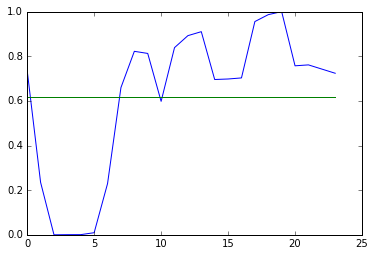

In [66]:
plt.plot(building_model["Electricity:Facility [kW](Hourly)"])
plt.plot(range(0,24), np.ones(24)*building_model["Electricity:Facility [kW](Hourly)"].mean())
plt.show()

In [ ]:
(columns.value for column in list(df.columns.values))

# Notes:
* It's impossible to separate all working days perfectly, since for instance the school in  RefBldgSecondarySchoolNew2004_v1.3_7.1_5B_USA_CO_BOULDER.csv on Presidents' Day was open for some kind of activity...

In [ ]:
for file in files:
    plot_range(folder, file, "2004-01-01","2004-12-31")

To obtain the number of peaks we can normalize it to the mean to get something like a sinusoid, and then count the times it passes above or under it.
In this way we avoid counting all the small peaks that have no role

# Features:
* building kind!!! (school, office, house, etc)
* city code